# <center>Guided Project: Predicting Car Prices</center>

# Introduction

In this guided project, we'll predict a car's market price using its attributes with the help of the k-nearest neighbors algorithm. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

# Loading the dataset

## Importing libraries

In [23]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Creating a dataframe

In [2]:
# Column names list

cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [3]:
df = pd.read_csv('imports-85.data', names=cols)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Determine which columns are numeric and can be used as features and which column is the target column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
# New dataframe with numeric values only

values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
               'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = df[values_cols]

# Data cleaning

## Replacing "`?`" missing values

In [6]:
cars = cars.replace('?', np.nan)

## Correcting column types

In [7]:
# Type change to float

cars = cars.astype('float')

## Dealing with missing values

In [8]:
# Sum of NaNs

cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
# Remove any rows with missing `price` values

cars = cars.dropna(subset=['price'])

In [10]:
# Fill missing values in other columns using column means

cars = cars.fillna(cars.mean())

## Data normalizing

In [11]:
# Normalize all columns except target

unmod_price = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = unmod_price

# Univariate model

## Creating a function 

In [12]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    knn = KNeighborsRegressor()
        
    # Randomize order of rows
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round
    half_round_rows = int(len(random_df) / 2)
    
    # The first half as training set and the second half as test set
    train_df = random_df.iloc[0:half_round_rows]
    test_df = random_df.iloc[half_round_rows:]
    
    # Fit a KNN model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions
    predicted = knn.predict(test_df[[train_col]])

    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predicted)
    rmse = np.sqrt(mse)
    
    return rmse

## Generating results

In [13]:
rmse_dict = {}
train_cols = cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    rmse_dict[col] = rmse_val

rmse_dict

{'normalized_losses': 7625.4735831635235,
 'wheel_base': 5515.846252604965,
 'length': 5404.45662309275,
 'width': 4616.727651091889,
 'height': 7846.702837788268,
 'curb_weight': 4390.831218314223,
 'engine_size': 3217.672060098206,
 'bore': 7048.9719901009485,
 'stroke': 8154.290159950973,
 'compression_rate': 6195.087352423566,
 'horsepower': 4033.238993343407,
 'peak_rpm': 7228.221928792806,
 'city_mpg': 4573.553717269808,
 'highway_mpg': 5127.870302070001}

## Modifying the function to accept a parameter for the `k` value

In [14]:
def knn_train_test(train_col, target_col, df, k_values):
    np.random.seed(1)
        
    # Randomize order of rows
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round
    half_round_rows = int(len(random_df) / 2)
    
    # The first half as training set and the second half as test set
    train_df = random_df.iloc[0:half_round_rows]
    test_df = random_df.iloc[half_round_rows:]
    
    k_rmses = {}
    
    for k in k_values:
        # Fit a KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions
        predicted = knn.predict(test_df[[train_col]])

        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predicted)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

## Generating results

In [15]:
# suggested k values
k_values = [1,3,5,7,9]

k_rmse_dict = {}

train_cols = cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars, k_values)
    k_rmse_dict[col] = rmse_val

k_rmse_dict

{'normalized_losses': {1: 9169.343202344224,
  3: 6880.446272095314,
  5: 7625.4735831635235,
  7: 7473.664789346109,
  9: 7738.876108695796},
 'wheel_base': {1: 4855.5992594443815,
  3: 5184.378495648115,
  5: 5515.846252604965,
  7: 5477.656799317875,
  9: 5782.551803928287},
 'length': {1: 5647.675258173241,
  3: 5328.247336279319,
  5: 5404.45662309275,
  7: 5436.492374560482,
  9: 5379.091143788758},
 'width': {1: 4661.521707947241,
  3: 4614.760371701744,
  5: 4616.727651091889,
  7: 4601.566039816409,
  9: 4646.370571277915},
 'height': {1: 12172.675286627149,
  3: 8658.387014639016,
  5: 7846.702837788268,
  7: 7702.912254324187,
  9: 7775.771673730523},
 'curb_weight': {1: 5520.99749830025,
  3: 5038.26321442437,
  5: 4390.831218314223,
  7: 4369.389287209419,
  9: 4631.017219623442},
 'engine_size': {1: 3793.0524594837916,
  3: 2888.101089122418,
  5: 3217.672060098206,
  7: 3581.324289617956,
  9: 3786.6109385990276},
 'bore': {1: 6936.672777904604,
  3: 7268.13343244737,
  

## Visualisation

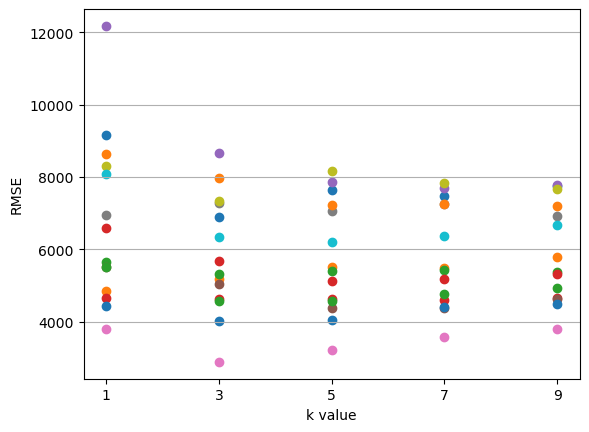

In [16]:
for k,v in k_rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.xticks(x, [1,3,5,7,9])
    
plt.grid(axis = 'y')

# Multivariate Model

## Computing average RMSE across different `k` values for each feature

In [17]:
feature_avg_rmse = {}

for k,v in k_rmse_dict.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_rmse = pd.Series(feature_avg_rmse)
sorted_series_rmse = series_rmse.sort_values()
sorted_features = sorted_series_rmse.index

## Modifying the function to use different logic

In [18]:
def knn_train_test(train_col, target_col, df, k_values):
    np.random.seed(1)
        
    # Randomize order of rows
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round
    half_round_rows = int(len(random_df) / 2)
    
    # The first half as training set and the second half as test set
    train_df = random_df.iloc[0:half_round_rows]
    test_df = random_df.iloc[half_round_rows:]
    
    k_rmses = {}
    
    for k in k_values:
        # Fit a KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions
        predicted = knn.predict(test_df[train_col])

        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predicted)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

## Generating results

In [19]:
k_rmse_results = {}

for i in range(2,7):
    k_rmse_results[f'{i} best features'] = knn_train_test(sorted_features[:i], 'price', cars, [5])

k_rmse_results

{'2 best features': {5: 2950.385134450104},
 '3 best features': {5: 3554.861324278556},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3360.832156381264},
 '6 best features': {5: 3667.6737231392244}}

# Hyperparameter Tuning

## Optimizing the model

In [20]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round
    half_round_rows = int(len(random_df) / 2)
    
    # The first half as training set and the second half as test set
    train_df = random_df.iloc[0:half_round_rows]
    test_df = random_df.iloc[half_round_rows:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit a KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions
        predicted = knn.predict(test_df[train_col])

        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predicted)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

## Generating results

In [21]:
k_rmse_results = {}

for i in range(2,7):
    k_rmse_results[f'{i} best features'] = knn_train_test(sorted_features[:i], 'price', cars)

k_rmse_results

{'2 best features': {1: 3237.730188307424,
  2: 2730.0395343128075,
  3: 2802.0964195284987,
  4: 2867.177753004988,
  5: 2950.385134450104,
  6: 3069.7857667051207,
  7: 3159.915090068036,
  8: 3433.3694394749878,
  9: 3758.846617631315,
  10: 4030.7718409704607,
  11: 4172.405628745994,
  12: 4286.9355874510575,
  13: 4362.105521426254,
  14: 4428.92391026075,
  15: 4546.281069699548,
  16: 4669.689810222169,
  17: 4728.309699270652,
  18: 4792.146203300139,
  19: 4823.068734250428,
  20: 4841.2379001415875,
  21: 4834.063654371646,
  22: 4830.093200166389,
  23: 4852.355429057597,
  24: 4879.157518967971},
 '3 best features': {1: 3475.0434914295292,
  2: 3471.805146854122,
  3: 3338.6754619884887,
  4: 3358.223552448202,
  5: 3554.861324278556,
  6: 3705.2262290096155,
  7: 3665.585437597015,
  8: 3745.5661776948136,
  9: 3987.7362542939127,
  10: 4000.133351106393,
  11: 4140.931557450458,
  12: 4266.610606768355,
  13: 4339.335155387125,
  14: 4324.572855666379,
  15: 4395.1174820

## Visualisation

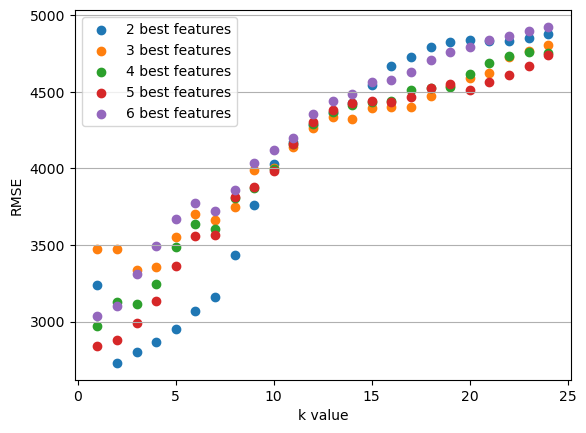

In [22]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.scatter(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.grid(axis = 'y')
plt.legend()

- **The best model was obtained for 2 best features and `k` = 2**
- RMSE values under 3000 can be observed for: 2 best features, 5 best features and 4 best features